In [2]:
from os import listdir
import random
import numpy as np
import seaborn
from scipy import stats
from matplotlib import image
import matplotlib.pyplot as plt

In [4]:
path = 'mirflickr/'
quantity = 250
random = 4 

RGB = {
    'red': 0,
    'green': 1,
    'blue': 2
}

matspodivannia = {
    'red': 0,
    'green': 0,
    'blue': 0  
}

dispersion = {
    'red': 0,
    'green': 0,
    'blue': 0  
}

1. Сформувати тестову вибірку зображень з вихідного пакета;

In [5]:
def get_test_sample(path, quantity, random):
    
    np.random.RandomState(random)
    ind = np.random.choice(range(25000), quantity)
    sample = list()
    for i in range(quantity):
        file = 'im' + str(ind[i]) + '.jpg'
        sample.append(image.imread(path + file))
    val = np.zeros((3, 256))
    for img in sample:
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                val[0][img[i][j][0]] += 1
                val[1][img[i][j][1]] += 1
                val[2][img[i][j][2]] += 1
    print('The sample is formed!')   
    
    return val, sample

In [7]:
val, sample = get_test_sample(path, quantity, random)

The sample is formed!


2. Для кожного каналу кольору кожного зображення з тестового пакета обчислити наступні характеристики: 
a. Максимальна / мінімальне значення; 
b. Математичне сподівання і дисперсію; c. Медіану значень, інтерквартільний розмах; 
d. Коефіцієнти асиметрії та ексцесу (нормалізований);

In [23]:
def get_values(val, RGB, kanal):
    
    print(kanal)
    for ind in range(255, 0, -1):
        if (val[RGB[kanal]][ind] != 0):
            print(f'Max {ind}, ')
            break
    for ind in range(0, 255):
        if (val[RGB[kanal]][ind] != 0):
            print(f'Min {ind}\n')
            break

def get_matspod_and_disp(val, RGB, kanal):
    
    print(kanal)
    sum_val = sum(val[RGB[kanal]])
    matspod = 0
    for ind in range(len(val[RGB[kanal]])):
        k = (val[RGB[kanal]][ind] / sum_val)
        matspod += k * ind
    disp = 0
    for ind in range(len(val[RGB[kanal]])):
        k = (val[RGB[kanal]][ind] / sum_val)
        disp += k * ((ind - matspod) ** 2)        
    matspodivannia[kanal] = matspod
    dispersion[kanal] = disp
    print(f'Matematuchne spodivannia {matspod}')
    print(f'Dispersia {disp}\n')   
    
def get_median(m):
    
    sum_val = sum(m)
    summa = 0
    for ind in range(len(m)):
        summa += m[ind]
        if (summa > (sum_val / 2)):
            return ind - 1
        if (summa == (sum_val / 2)):
            return (2 * ind + 1) / 2

def get_quartile(m, quartile):
    
    summa_values = sum(m)
    summa = 0
    for i in range(len(m)):
        prev_sum = summa
        p = m[i] /  summa_values
        summa += p
        if (summa > quartile):
            if (quartile - prev_sum < summa - quartile):
                return i - 1
            elif (quartile - prev_sum > summa - quartile):
                return i
            else:
                return (2 * i - 1) / 2   

def get_median_quartile(val, RGB, kanal):
    
    print(kanal)
    print(f'Mediana {get_median(val[RGB[kanal]])}')
    print(f'Quartile {get_quartile(val[RGB[kanal]], 0.75) - get_quartile(val[RGB[kanal]], 0.25)}\n')
    
def fi(m, matspod, p):
    
    sum_val = sum(m)
    f = 0
    for ind in range(len(m)):
        k = (m[ind] / sum_val)
        f += k * ((ind - matspod) ** p)
    return f

def get_asymm_excess(val, RGB, kanal):
    
    print(kanal)
    asymm = fi(val[RGB[kanal]], matspodivannia[kanal], 3) / (dispersion[kanal] ** (3 / 2))
    excess = fi(val[RGB[kanal]], matspodivannia[kanal], 4) / (dispersion[kanal] ** 2) - 3
    print(f'Asymmetry {asymm}')
    print(f'Excess {excess}\n')

In [24]:
red_val = get_values(val, RGB, 'red')
green_val = get_values(val, RGB, 'green')
blue_val = get_values(val, RGB, 'blue')

red
Max 255, 
Min 0

green
Max 255, 
Min 0

blue
Max 255, 
Min 0



In [25]:
red_matspod_disp = get_matspod_and_disp(val, RGB, 'red')
green_matspod_disp = get_matspod_and_disp(val, RGB, 'green')
blue_matspod_disp = get_matspod_and_disp(val, RGB, 'blue')

red
Matematuchne spodivannia 112.46137143166057
Dispersia 6451.311294450753

green
Matematuchne spodivannia 105.07128432790495
Dispersia 5757.272324621652

blue
Matematuchne spodivannia 96.90362810414292
Dispersia 6148.770258807423



In [26]:
red_median_quartile = get_median_quartile(val, RGB, 'red')
green_median_quartile = get_median_quartile(val, RGB, 'green')
blue_median_quartile = get_median_quartile(val, RGB, 'blue')

red
Mediana 106
Quartile 141

green
Mediana 96
Quartile 127

blue
Mediana 79
Quartile 134



In [27]:
red_asymm_excess = get_asymm_excess(val, RGB, 'red')
green_asymm_excess = get_asymm_excess(val, RGB, 'green')
blue_asymm_excess = get_asymm_excess(val, RGB, 'blue')

red
Asymmetry 0.21448734507915854
Excess -1.2141861100990232

green
Asymmetry 0.3363650189262511
Excess -1.035839693759494

blue
Asymmetry 0.4911660622111558
Excess -0.9964181519082067



3. Для кожного каналу кольору кожного зображення з тестового пакета побудувати гістограму значень яскравості пікселів;

In [28]:
def get_histogram(val, RGB, kanal):
    
    plt.bar(range(256), val[RGB[kanal]])
    plt.title(kanal)
    plt.xlabel('bright')
    plt.ylabel('frequency')
    plt.show()

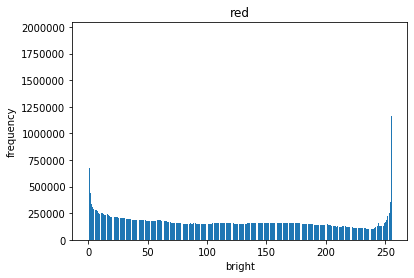

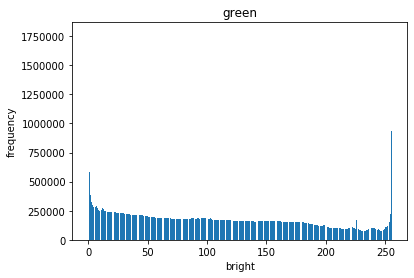

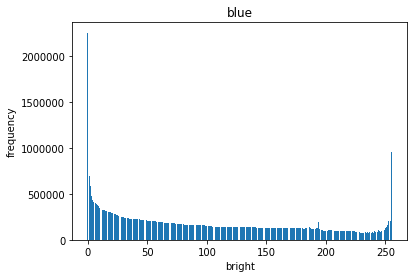

In [29]:
red_histogram = get_histogram(val, RGB, 'red')
green_histogram = get_histogram(val, RGB, 'green')
blue_histogram = get_histogram(val, RGB, 'blue')

4. Провести апроксимацію отриманих гістограм з використанням відомих імовірнісних розподілів, визначити найкращу апроксимацію;
5. Побудувати розподіл типів використаних імовірнісних розподілів для яких досягається мінімальне значення помилки апроксимації з п.4.

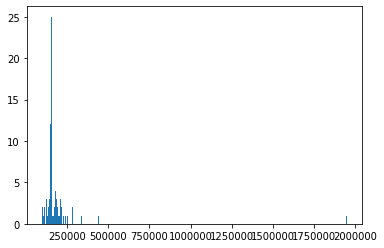

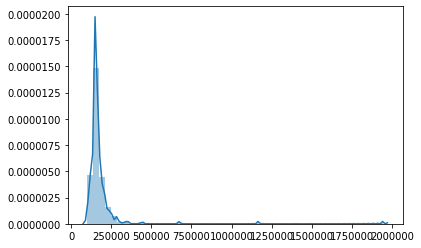

In [30]:
test = val[RGB['red']]
plt.hist(test, bins=1000)
plt.show()

X, Y = seaborn.distplot(np.ravel(test)).get_lines()[0].get_data()

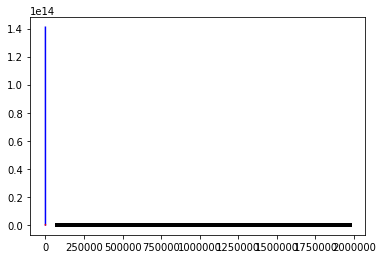

In [31]:
x_min, x_max = min(plt.xticks()[0]), max(plt.xticks()[0])
m, s = stats.norm.fit((X, Y))
pg = stats.norm.pdf(np.linspace(0, 255, len(X)), m, s)
plt.plot(np.linspace(0, 255, len(X)), pg, label='norm', color='black')
plt.plot(X, Y, color='black', linewidth=4)
plt.plot(np.linspace(0, 255, len(X)), pg, label='norm')
ag, bg, cg = stats.gamma.fit((X, Y))
kgamma = stats.gamma.pdf(np.linspace(0, 255, len(X)), ag, bg, cg)
plt.plot(np.linspace(0, 255, len(X)), kgamma, label='gamma', color='blue')
ab, bb, cb, db = stats.beta.fit((X, Y))
kbeta = stats.beta.pdf(np.linspace(0, 255, len(X)), ab, bb, cb, db)
plt.plot(np.linspace(0, 255, len(X)), kbeta, label='beta', color='red')
plt.show()